# BlackJack
---

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14, 10]
import pandas as pd
import numpy as np
import requests
import time
import requests
import json


In [6]:
file_to_load = "data/blkjckhands.csv"

# Read Purchasing File and store into Pandas data frame
BlackJack = pd.read_csv(file_to_load)
df=pd.DataFrame(BlackJack)
dealup_df=df[["ply2cardsum","dealcard2","winloss"]]
dealup_df=dealup_df.rename(columns={"ply2cardsum": "DealTotal",
                                 #"dealcard1": "DealerDwn",
                                 "dealcard2": "DealerUp",
                                 "winloss": "WinLoss"})

dealup_df.head()


,DealTotal,DealerUp,WinLoss
0,17,8,Loss
1,19,8,Win
2,17,8,Loss
3,12,8,Loss
4,12,8,Loss


In [7]:
df_count=(df["winloss"].count())
WinLoss=df.loc[:, ["winloss", "someofcards", "ply2cardsum"]]
WinLoss_count=WinLoss["winloss"].value_counts()
WinLoss_percentage=WinLoss_count/df_count * 100
WinLoss_percentage.head()

WinLoss_df=pd.DataFrame({"Win/Loss Percentage": WinLoss_percentage})
WinLoss_df=WinLoss_df["Win/Loss Percentage"].map("{:,.2f}%".format)
WinLoss_df.head()

Loss    47.76%
Win     42.88%
Push     9.36%
Name: Win/Loss Percentage, dtype: object

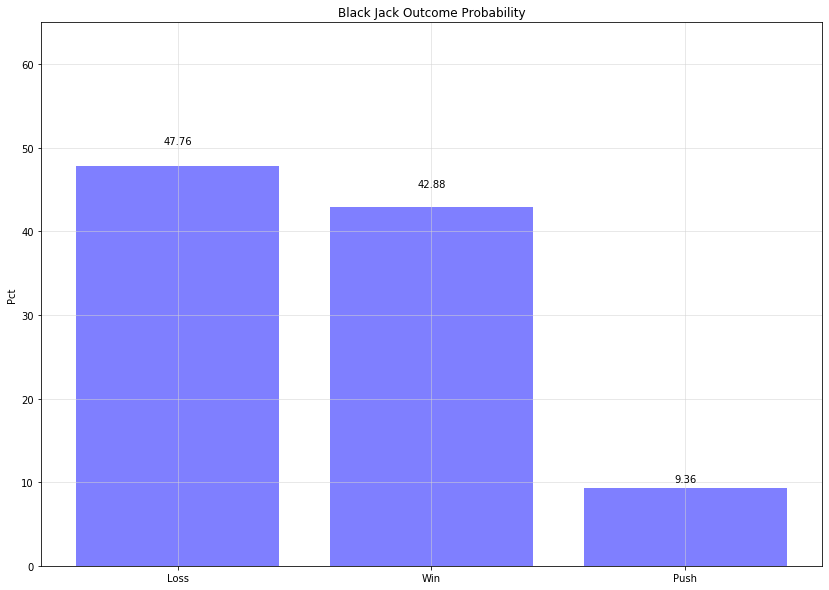

In [8]:
outcome=[47.76, 42.88, 9.36]
labels=["Test"]
x_axis=np.arange(len(outcome))
width=.5
#index=['LOSS', 'WIN', 'TIE']


fig, ax = plt.subplots()
bars=ax.bar(x_axis, outcome, color = 'b', alpha=.5, align="center")
ax.set_xticks(np.add(x_axis-0.5,width)) # set the position of the x ticks
ax.set_xticklabels(('Loss', 'Win', 'Push'))
def autolabel(rects):
    # attach some text labels
    for rect in bars:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%0.02f'% float(height),ha='center', va='bottom')
autolabel(bars)

ax.set_ylim(0,65)
ax.set_ylabel('Pct')
ax.set_title('Black Jack Outcome Probability')
#ax.set_xticks(index + 0.0)
ax.set_autoscaley_on(False)

ax.grid(True, linewidth = .5, color = 'lightgrey')

plt.savefig('BlackJackOutProb.png') 

plt.show()

In [9]:
dealup_df.groupby("WinLoss")
dealup_df.max()

DealTotal     21
DealerUp      11
WinLoss      Win
dtype: object

In [11]:
#Stats by player
df["start_hand"] = df["card1"] + df["card2"]
bj_data_ren = df.rename(columns={"PlayerNo" : "player_no"})
bj_data_ren.head()

,Unnamed: 0,player_no,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,start_hand
0,0,Player1,7,10,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,18,nowin,Win,Plwin,Beat,20,0,19,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,17,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,18,nowin,Loss,Beat,Dlwin,0,10,12,12


In [12]:
#Organize into Win/Loss frame
bj_data_1 = bj_data_ren[["start_hand", "winloss"]]
bj_data_2 = pd.DataFrame(bj_data_1)

bj_data_2.head()

,start_hand,winloss
0,17,Loss
1,19,Win
2,17,Loss
3,12,Loss
4,12,Loss


In [13]:
#Organize into Win/Loss frame
bj_data_1 = bj_data_ren[["start_hand", "winloss"]]
bj_data_2 = pd.DataFrame(bj_data_1)

bj_data_2.head()

,start_hand,winloss
0,17,Loss
1,19,Win
2,17,Loss
3,12,Loss
4,12,Loss


In [14]:
#Calculate percentages
# Wins + Pushes vs Losses
game = []
prob_win = []
prob_loss = []
x = 0
y=0
win = 0
loss = 0
#print (win)
for row in bj_data_2.iterrows():
#         print(row['winloss'])
    if x > 5: 
        y= y+1
        game.append(y)
        prob_win.append(win/6)
        prob_loss.append(loss/6)
        win = 0
        loss = 0
        x = 0
        if row[1]['winloss'] == "Win":
            win = win+1
        elif row[1]['winloss'] == "Push":
            win = win+1
        else:
            loss = loss+1
        
    else:        
        if row[1]['winloss'] == "Win":
            win = win+1
        elif row[1]['winloss'] == "Push":
            win = win+1
        else:
            loss = loss+1
        
    x = x+1 
#print(game)
    
lst_games = list(zip(game, prob_win, prob_loss))
probability = pd.DataFrame(lst_games, columns = ["game","win","loss"])
probability.head()

,game,win,loss
0,1,0.166667,0.833333
1,2,1.000000,0.000000
2,3,1.000000,0.000000
3,4,0.500000,0.500000
4,5,0.333333,0.666667


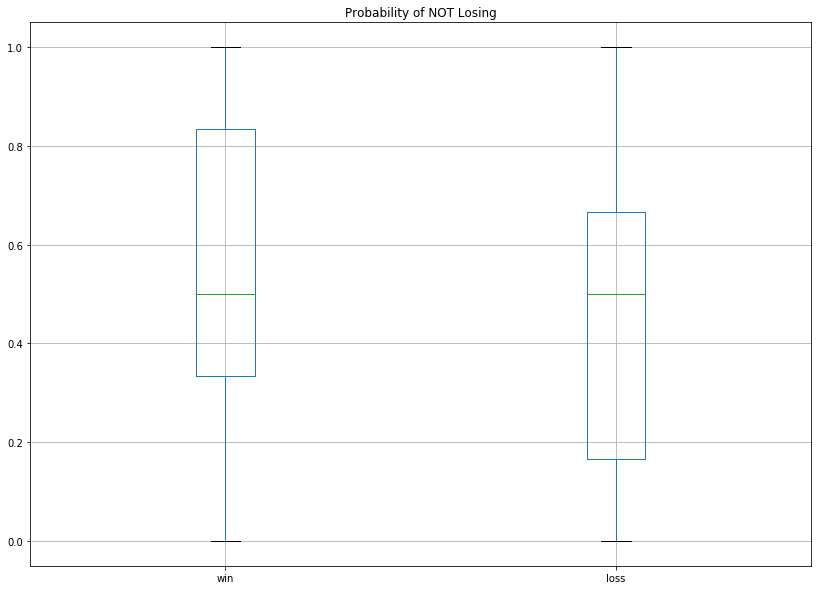

In [16]:
#plot box graph

myfig = plt.figure()
plt.title('Probability of NOT Losing')
boxplot = probability.boxplot(column = ['win','loss'])
myfig.savefig("boxplot.png")

In [17]:
# Plot the player bar graph

bj_data_3 = pd.DataFrame(bj_data_ren[["player_no", "winloss"]])
#bj_data_2 = pd.DataFrame(bj_data_1)

bj_data_3.head()

,player_no,winloss
0,Player1,Loss
1,Player2,Win
2,Player3,Loss
3,Player4,Loss
4,Player5,Loss


In [18]:
player_bar = bj_data_3.pivot_table(index = "player_no", columns = "winloss", aggfunc='size', fill_value = 0)
player_bar.head()

winloss,Loss,Push,Win
player_no,,,
Player1,71506,14098,64396
Player2,71701,13959,64340
Player3,71869,13826,64305
Player4,71748,13831,64421
Player5,71663,14231,64106


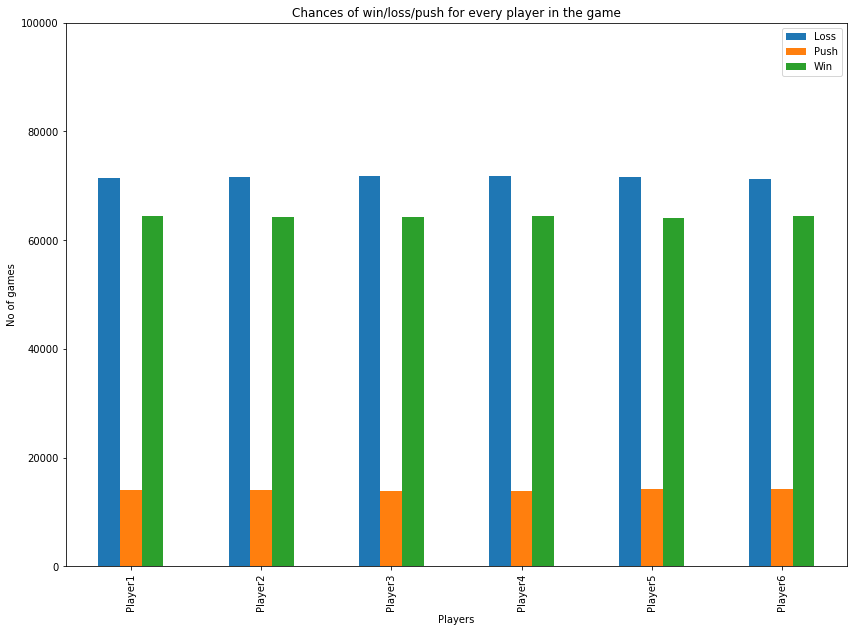

In [19]:
player_bar.plot.bar()
plt.ylim(0, 100000)

# plt.xlim(0, 23)
plt.legend(loc="best")
plt.ylabel("No of games")
plt.xlabel("Players")
plt.title('Chances of win/loss/push for every player in the game')

plt.show()

In [20]:
dealup_pvt = pd.pivot_table(dealup_df,index=["DealTotal"]
               ,columns=["WinLoss"]
               ,values=["WinLoss"]
               ,aggfunc=['size']
               ,fill_value = 0)

In [21]:
dealup_pvt.head()

size            
WinLoss     Loss  Push   Win
DealTotal                   
2            984    91   524
3           2609   201  1241
4           6320   521  3336
5          10350   970  5327
6          13808  1388  7123

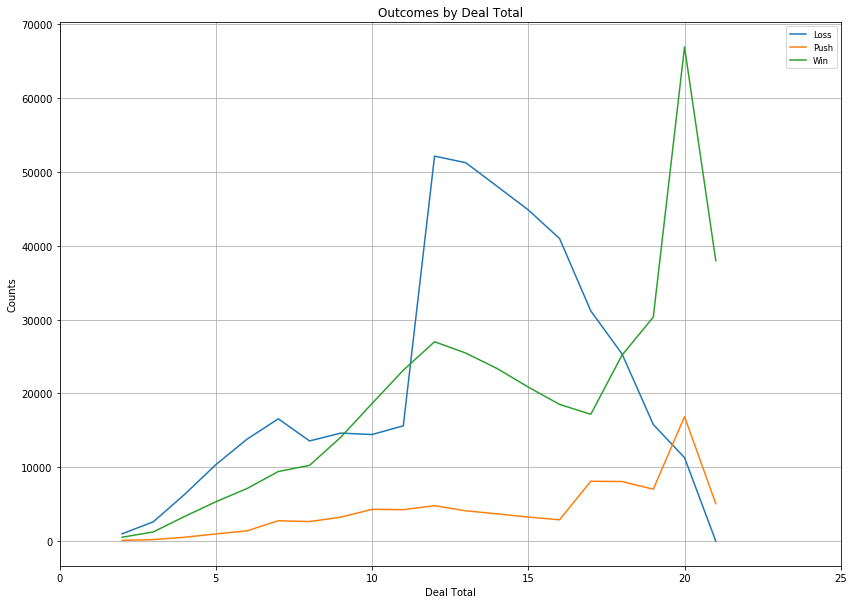

In [22]:
dealup_pvt.plot.line()
plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Outcomes by Deal Total')
plt.xlabel('Deal Total')
plt.ylabel('Counts')
plt.xlim(0, 25)

# Save the Figure
plt.savefig("OCByDealTotal.png")
plt.show()

In [23]:
dealup7 = pd.pivot_table(dealup_df[dealup_df.DealerUp == 7]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [24]:
dealup7.head()

size          
WinLoss   Loss Push  Win
DealTotal               
2           80    7   46
3          199   10  109
4          450   33  294
5          717   79  478
6          974  113  617

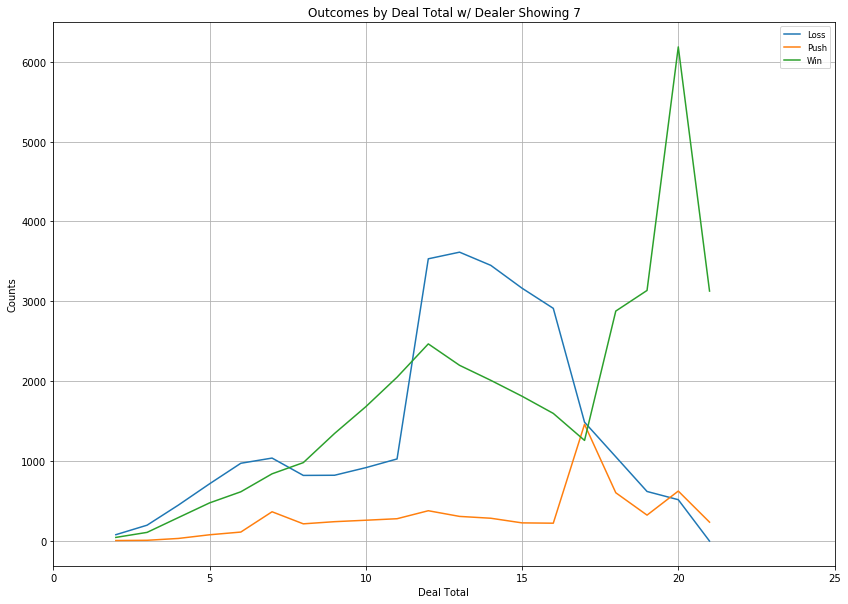

In [25]:
dealup7.plot.line()

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Outcomes by Deal Total w/ Dealer Showing 7')
plt.xlabel('Deal Total')
plt.ylabel('Counts')
plt.xlim(0, 25)

# Save the Figure
plt.savefig("OCByDT_Dlr7.png")
plt.show()

In [26]:
dealup10FC = pd.pivot_table(dealup_df[dealup_df.DealerUp == 10]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [27]:
dealup10FC.head()

size           
WinLoss    Loss Push   Win
DealTotal                 
2           307   32   164
3           758   70   368
4          1933  183  1054
5          3145  341  1596
6          4371  514  2229

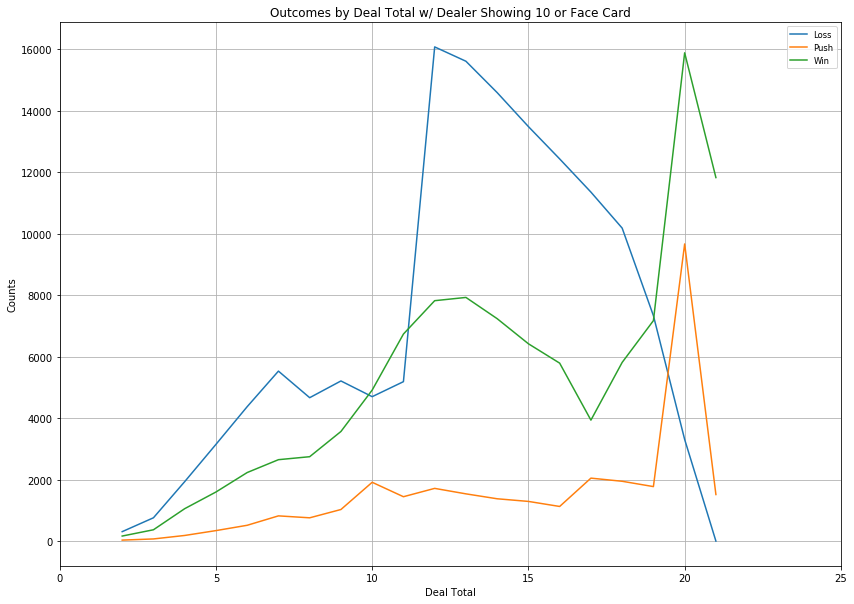

In [33]:
dealup10FC.plot.line()

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Outcomes by Deal Total w/ Dealer Showing 10 or Face Card')
plt.xlabel('Deal Total')
plt.ylabel('Counts')
plt.xlim(0, 25)

# Save the Figure
plt.savefig("OCByDT_Dlr10FC.png")
plt.show()

In [29]:
#df2 = df[(df.a != -1) | (df.b != -1)]

dealupAce = pd.pivot_table(dealup_df[(dealup_df.DealerUp == 1) | (dealup_df.DealerUp == 11)]
                         , index=["DealTotal"]
                         , columns=["WinLoss"]
                         , values=["WinLoss"]
                         , aggfunc=['size']
                         ,fill_value = 0)

In [30]:
dealupAce.head()

size          
WinLoss    Loss Push  Win
DealTotal                
2            93    8   15
3           231   19   55
4           556   56  157
5           953   85  235
6          1211  115  291

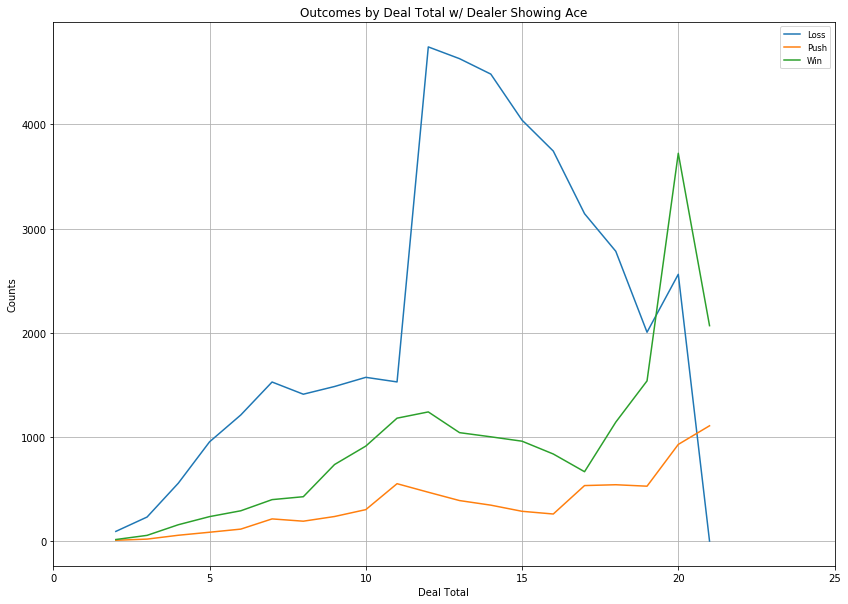

In [43]:
dealupAce.plot.line()
#x_axis = [2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21]

plt.legend(('Loss','Push','Win'),
           loc="best", fontsize="small", fancybox=True)
plt.grid(True)
plt.title('Outcomes by Deal Total w/ Dealer Showing Ace')
plt.xlabel('Deal Total')
plt.ylabel('Counts')
#plt.xticks([x_axis])
plt.xlim(0, 25)

# Save the Figure
plt.savefig("OCByDT_DlrA.png")
plt.show()